# Task 1. Experimental time complexity analysis

## Samarin Anton, C4113

### September 25, 2019

In [119]:
import timeit
import numpy
import matplotlib.pyplot as plt
from functools import wraps
import numpy as np
import warnings

warnings.filterwarnings('ignore')

## Helpers

In [120]:
sizes = [100, 200, 300, 400, 500, 600, 700, 800, 900, 1000]  # sizes of containers
template = 'Dependence of time on the number of elements of a'  # template for graphic title

In [122]:
def gen_vector(size):
    '''generates an array of a given size'''
    return np.random.uniform(1, 1000, size)

In [123]:
def gen_matrix(size):
    '''generates a matrix of a given size'''
    return np.array([gen_vector(size) for vec in range(size)])

In [124]:
def gen_two_matrix(size):
    '''generates two matrixes of a given size'''
    return gen_matrix(size), gen_matrix(size)

In [125]:
def wrap_to_tuple(func):
    '''wrap output of function in tuple'''
    
    @wraps(func)
    def wraps_function(*args):
        return (func(*args),)
    
    return wraps_function

In [126]:
def benchmark(func):
    '''measure time of function executed'''
    
    @wraps(func)
    def measure_time(*args):
        function = func
        time_executed = np.mean(timeit.repeat('function(*args)', repeat=5, number=1,  globals=locals()))
        return time_executed
    
    return measure_time

In [127]:
def show_graph(func, process_data, title, degree, teor_label, limit_up=1):
    '''draw graph with practical data and polinom approximated'''
    times = [func(*process_data(size)) for size in sizes]
    plt.scatter(sizes, times, color='blue', label='empirical time complexity')
    coefficients = np.polyfit(sizes, times, degree)
    polinom = lambda x: np.sum([coef * x ** deg for deg, coef in enumerate(reversed(coefficients))])
    plt.plot(sizes, [polinom(x) for x in sizes], color='red', label=teor_label)
    
    plt.ylim(0, np.max(times) * limit_up)
    
    plt.xlabel('Number of elements')
    plt.ylabel('Time')
    plt.title(title)
    plt.legend(loc='best')
    plt.grid()
    plt.show()

## 1) Constant function

In [128]:
@benchmark
def constant(vec):
    return 42

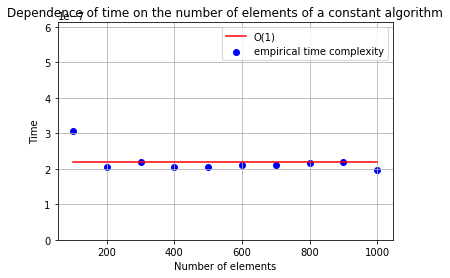

In [165]:
show_graph(constant, wrap_to_tuple(gen_vector), f'{template} constant algorithm', 0, 'O(1)', 2)

Algorithm has a constant complexity (i.e $O(1)$) because it's work doesn't depend from size of vector.<br/>
Also empirical time complexity is approximated of constant function

## 2) The sum of elements

In [130]:
@benchmark
def sum_vec(vec):
    s = 0  # 1 action
    for val in vec:  # n actions
        s += val  # 1 action
    return s  # 1 action

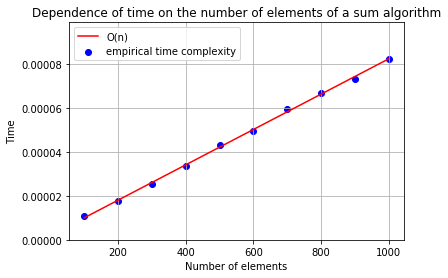

In [168]:
show_graph(sum_vec, wrap_to_tuple(gen_vector), f'{template} sum algorithm', 1, 'O(n)', 1.2)

$1 + 1 + 1 * n = 2 + n = O(n)$<br/>
Also empirical time complexity is approximated of linear function

## 3) The product of elements

In [132]:
@benchmark
def prod_vec(vec):
    p = 1  # 1 action
    for val in vec:  # n actions
        p *= val  # 1 action
    return p  # 1 action

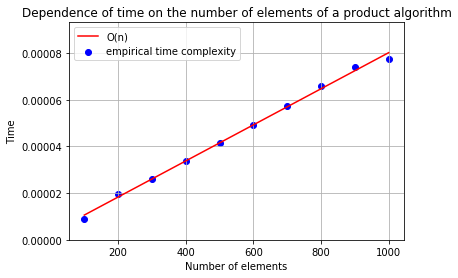

In [133]:
show_graph(prod_vec, wrap_to_tuple(gen_vector), f'{template} product algorithm', 1, 'O(n)', 1.2)

$1 + 1 + 1 * n = 2 + n = O(n)$<br/>
Also empirical time complexity is approximated of linear function

## 4) The Euclidean norm of the elements

In [134]:
@benchmark
def eucld_norm(vec):
    s = 0  # 1 action
    for val in vec:  # n actions
        s += val ** 2  # 2 actions
    return np.sqrt(s)  # 2 actions

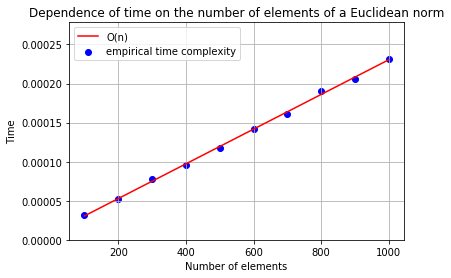

In [173]:
show_graph(eucld_norm, wrap_to_tuple(gen_vector), f'{template} Euclidean norm', 1, 'O(n)', 1.2)

$1 + 2 + 2 * n = 3 + 2 * n = O(n)$<br/>
Also empirical time complexity is approximated of linear function

## 5) Polinomial

### 5.1) Direct calculation

In [136]:
@benchmark
def polinomial_eval(vec, x=1.5):
    s = 0  # 1 action
    for deg, val in enumerate(vec):  # n actions
        s += val * x ** deg  # 3 action
    return s  # 1 action

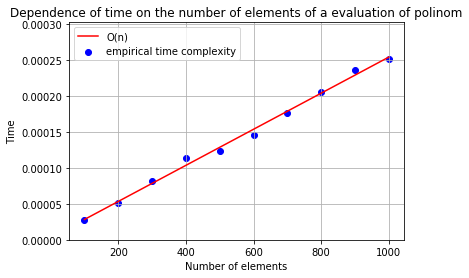

In [175]:
show_graph(polinomial_eval, wrap_to_tuple(gen_vector), f'{template} evaluation of polinom', 1, 'O(n)', 1.2)

Since the maximum size is 1000, I think that the operation ($**$) have a constant time of execution<br/>
$1 + 1 + 3 * n = 2 + 3 * n = O(n)$<br/>
Also empirical time complexity is approximated of linear function

### 5.2) Horner’s method

In [138]:
@benchmark
def polinomial_eval_horner(vec, x=1.5):
    s = 0  # 1 action
    for val in reversed(vec):  # n actions in loop + n actions
        s = s * x + val  # 3 action
    return s  # 1 action

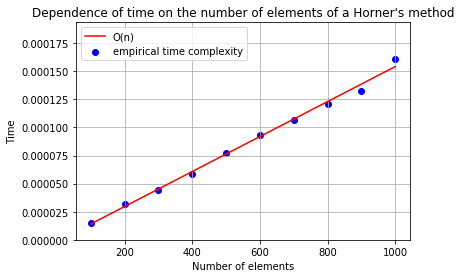

In [180]:
show_graph(polinomial_eval_horner, wrap_to_tuple(gen_vector), f"{template} Horner's method", 1, 'O(n)', 1.2)

$1 + 1 + n + 3 * n = 2 + 4 * n = O(n)$<br/>
Also empirical time complexity is approximated of linear function

## 6) The bubble sort

In [140]:
@benchmark
def bubble_sort(v):
    vec = np.array(v)  # n actions
    for i in range(0, len(vec) - 1):  # n - 1 actions
        for j in range(0, len(vec) - 1 - i):  # sum from 1 to n - 1 actions
            if vec[j] > vec[j + 1]:  # 1 action
                vec[j], vec[j + 1] = vec[j + 1], vec[j]  # 2 actions
    return vec  # 1 action

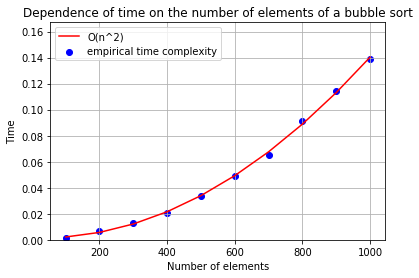

In [181]:
show_graph(bubble_sort, wrap_to_tuple(gen_vector), f'{template} bubble sort', 2, 'O(n^2)', 1.2)

$1 + n + 3 * \sum_{i=1}^{n-1} i = 1 + n + 1.5 * n * (n - 1) = 1.5 * n^2 - 0.5 * n + 1 = O(n^2) $<br/>
Also empirical time complexity is approximated of quadratic function

## 7) Matrix product

In [142]:
@benchmark
def matrix_product(A, B):
    return np.matmul(A, B)

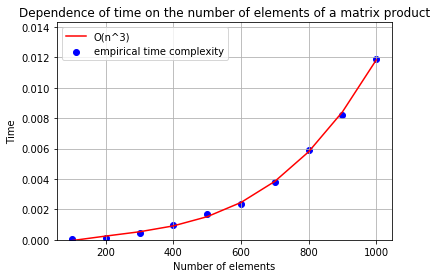

In [184]:
show_graph(matrix_product, gen_two_matrix, f'{template} matrix product', 3, 'O(n^3)', 1.2)

We can see that dependency is nonlinearly and it is the most likely approximated by the dependence $O(nˆ3)$